In [1]:
from numpy import linalg as LA
from scipy.stats import chi2
import cmath
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import multivariate_normal

In [2]:
import numpy as np

B = np.array([[40, -26], [-26, 25]])

In [3]:
A = np.linalg.cholesky(B)
A@A.T

array([[ 40., -26.],
       [-26.,  25.]])

In [4]:
samples = A @ np.random.randn(2, 1000000)

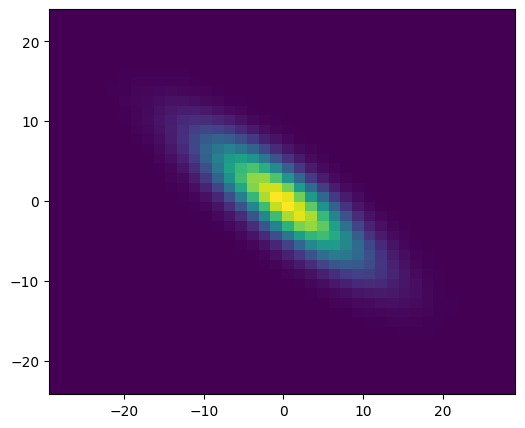

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

h, x, y, _  = ax.hist2d(*samples, bins=40)
ax.set_aspect('equal')

grid = np.stack(np.meshgrid((x[1:] + x[:-1])/2, (y[1:] + y[:-1])/2))
pdf = multivariate_normal.pdf(grid.reshape(2, -1).T, cov=B).reshape(h.shape)


plt.show()

---Выполнение задачи----

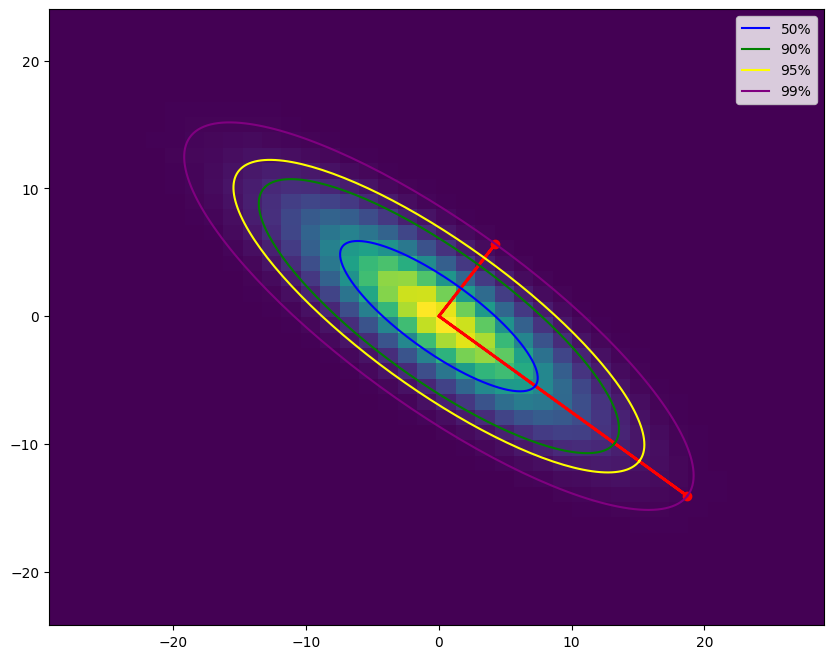

In [6]:
P = [0.5, 0.9, 0.95, 0.99]
colors = ['blue', 'green', 'yellow', 'purple']

def construct(B, quantile, n): 
    k = st.chi2.ppf(quantile, df=2) # хи квадрат с нужными степенями свободы
    B = B*k
    eigenvalues, eigenvectors = np.linalg.eig(B)
    X = np.linspace(0, 2*np.pi, num=n)
    circle = np.array([np.cos(X), np.sin(X)])
    Y = np.dot(np.dot(eigenvectors, np.diag(np.sqrt(np.abs(eigenvalues)))), circle)
    B = B / k
    return Y

eigenvalues, eigenvectors = np.linalg.eig(B)
vect = np.dot(eigenvectors, np.diag(np.sqrt(np.abs(eigenvalues)))) * (st.chi2.ppf(0.99, 2) ** 0.5) # содержит собственные векторы
    
plt.figure(figsize=(10, 8))
plt.hist2d(*samples, bins=40)
for i in range(len(P)):
    ellipse = construct(B, P[i], 200) # конструируем доверительный эллипс
    plt.plot(ellipse[0, :], ellipse[1, :], color = colors[i], label = str(int(100*P[i])) + '%')

for i in range(2):
    plt.arrow(0, 0, vect[0, i], vect[1,i], color = 'red', linewidth = 2)
plt.scatter([vect[0, 0], vect[0, 1]], [vect[1,0], vect[1, 1]], color = 'red') # концы собственных векторов
plt.legend()
plt.show()